In [7]:
import numpy as np
import pandas as pd

In [ ]:
class Neuron:
    def __init__(self, weights, bias):
        self.weights = np.array(weights)
        self.bias = bias
    
    def output(self, inputs):
        return np.dot(self.weights, inputs) + self.bias

In [4]:
neuron = Neuron(weights=[0.5, -0.6, 0.2], bias=0.1)
inputs = [1.0, 0.5, -1.5]
print("Neuron output:", neuron.output(inputs))

Neuron output: -2.7755575615628914e-17


In [ ]:
def ReLU(x):
    return np.maximum(0, x)

def LeakyReLU(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

In [6]:
print("ReLU output:", ReLU(neuron.output(inputs)))
print("Leaky ReLU output:", LeakyReLU(neuron.output(inputs)))
print("Sigmoid output:", sigmoid(neuron.output(inputs)))
print("Tanh output:", tanh(neuron.output(inputs)))

ReLU output: 0.0
Leaky ReLU output: -2.7755575615628914e-19
Sigmoid output: 0.5
Tanh output: -2.7755575615628914e-17


In [17]:
class LinearLayer:
    def __init__(self, input_size, output_size, weights=None, bias=None):
        self.weights = weights if weights is not None else np.random.randn(output_size, input_size)
        self.bias = bias if bias is not None else np.random.randn(output_size)
    
    def output(self, inputs):
        #print(self.weights)
        #print(self.bias)
        return np.dot(self.weights, inputs) + self.bias

In [18]:
lin = LinearLayer(input_size=3, output_size=2)
inputs = np.array([-1.0, -2.0, -3.0])
print("Linear Layer output:", lin.output(inputs))
print("Linear layer with relu activation:", ReLU(lin.output(inputs)))
print("Linear layer with sigmoid activation:", sigmoid(lin.output(inputs)))

Linear Layer output: [-0.71017271  5.37124096]
Linear layer with relu activation: [0.         5.37124096]
Linear layer with sigmoid activation: [0.32956068 0.99537315]


In [26]:
linear_layer_for_addition = LinearLayer(input_size=2, output_size=1, weights=np.array([[1, 1]]), bias=np.array([0]))
inputs_for_addition = np.array([2, 2])
print("Linear Layer output:", linear_layer_for_addition.output(inputs_for_addition))

Linear Layer output: [4]


In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [13]:
# 1. Data Generation
# We create 1000 points.
# X is the input, Y is X plus some random noise.
n_samples = 1000
X = np.linspace(-10, 10, n_samples)
noise = np.random.normal(0, 1.0, n_samples) # Mean 0, Std Dev 1
y = X + noise

Text(0.5, 1.0, 'Generated Data')

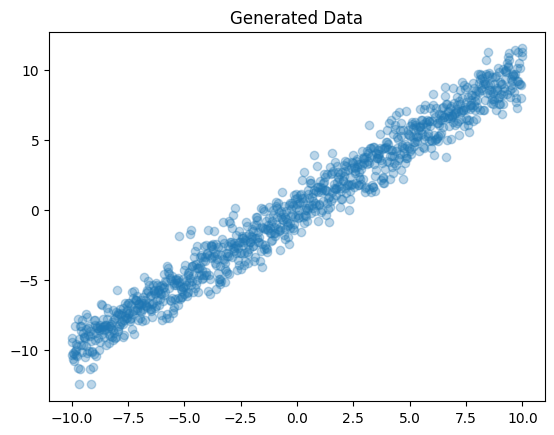

In [14]:
# visualise the data
plt.scatter(X, y, alpha=0.3)
plt.title("Generated Data")

The General Update Rule$$\theta_{t+1} = \theta_t - \eta \cdot \nabla_\theta J(\theta_t)$$

In [15]:
# 2. Variable Initialization
# We manually define the Weight and Bias
# W initialized randomly, b at zero
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')

# Hyperparameters
learning_rate = 0.01
epochs = 50

# 3. The Training Loop
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        # Forward pass: y = Wx + b
        y_pred = W * X + b
        
        # Loss: Mean Squared Error
        loss = tf.reduce_mean(tf.square(y - y_pred))

    # Calculate gradients of loss w.r.t W and b
    gradients = tape.gradient(loss, [W, b])
    
    # Manual Update (Stochastic Gradient Descent)
    # W = W - lr * grad_W
    W.assign_sub(gradients[0] * learning_rate)
    b.assign_sub(gradients[1] * learning_rate)

# 4. Results
print(f"Target: W=1.0, b=0.0")
print(f"Learned: W={W.numpy()[0]:.4f}, b={b.numpy()[0]:.4f}")

Target: W=1.0, b=0.0
Learned: W=0.9998, b=-0.0007
